In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache


/home/pinky/anaconda3/envs/allenSDK_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Example cache directory path, it determines where downloaded data will be stored
output_dir = '/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/'


In [3]:
# this path determines where downloaded data will be stored
manifest_path = os.path.join(output_dir, "manifest.json")

cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)

print(cache.get_all_session_types())

['brain_observatory_1.1', 'functional_connectivity']


In [4]:
sessions = cache.get_session_table()
brain_observatory_type_sessions = sessions[sessions["session_type"] == "brain_observatory_1.1"]


peristimulus time histograms
We are going to pick a session arbitrarily and download its spike data.



In [5]:
session_id = 791319847
session = cache.get_session_data(session_id)
print(f"structures: {cache.get_structure_acronyms()}")
presentations = session.get_stimulus_table("static_gratings")


/home/pinky/anaconda3/envs/allenSDK_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'hdmf-common' version 1.1.3 because version 1.8.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."
/home/pinky/anaconda3/envs/allenSDK_env/lib/python3.10/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.2.2 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


structures: ['APN', 'LP', 'MB', 'DG', 'CA1', 'VISrl', nan, 'TH', 'LGd', 'CA3', 'VIS', 'CA2', 'ProS', 'VISp', 'POL', 'VISpm', 'PPT', 'OP', 'NOT', 'HPF', 'SUB', 'VISam', 'ZI', 'LGv', 'VISal', 'VISl', 'SGN', 'SCig', 'MGm', 'MGv', 'VPM', 'grey', 'Eth', 'VPL', 'IGL', 'PP', 'PIL', 'PO', 'VISmma', 'POST', 'SCop', 'SCsg', 'SCzo', 'COApm', 'OLF', 'BMAa', 'SCiw', 'COAa', 'IntG', 'MGd', 'MRN', 'LD', 'VISmmp', 'CP', 'VISli', 'PRE', 'RPF', 'LT', 'PF', 'PoT', 'VL', 'RT']


In [8]:
presentations = session.get_stimulus_table("static_gratings")
units = session.units[session.units["ecephys_structure_acronym"] == 'VISp']

time_step = 0.01
time_bins = np.arange(-0.1, 0.5 + time_step, time_step)

histograms = session.presentationwise_spike_counts(
    stimulus_presentation_ids=presentations.index.values,  
    bin_edges=time_bins,
    unit_ids=units.index.values
)

histograms.coords

Coordinates:
  * stimulus_presentation_id         (stimulus_presentation_id) int64 49434 ....
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 ...
  * unit_id                          (unit_id) int64 951061537 ... 951062679

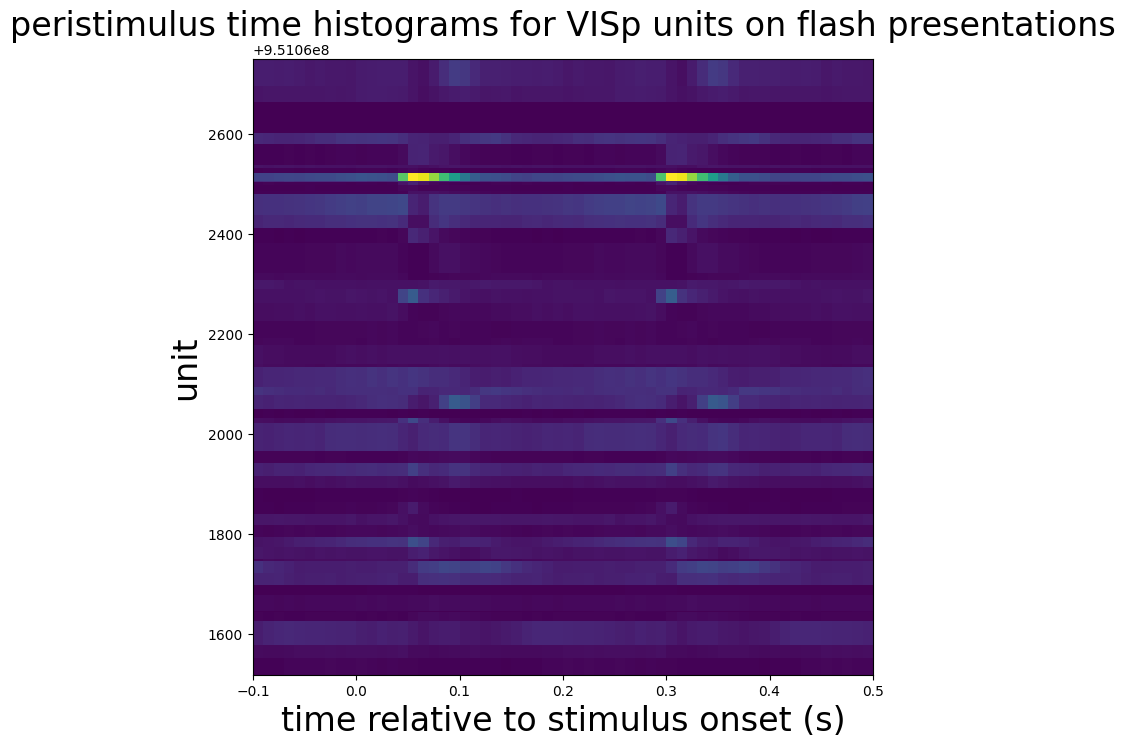

In [22]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")

fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"],
    mean_histograms["unit_id"], 
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=24)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=24)
ax.set_title("peristimulus time histograms for VISp units on flash presentations", fontsize=24)

plt.show()

In [32]:
#SaveInformation
np.save('/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/test.npy',histograms)
rf_stim_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'static_gratings']
rf_stim_table.to_csv('/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/out.csv', index=False)  


In [44]:
rf_stim_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == 'static_gratings']
rf_stim_table.to_csv('/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/out.csv', index=False)  


6000

In [47]:
rf_stim_table.to_csv('/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/out.csv', index=False)  

np.save('/media/DataMOBsRAIDN/PFC_InteroceptiveTuning/VIsualData/test2.npy',rf_stim_table)

In [55]:
rf_stim_table

,stimulus_block,start_time,stop_time,contrast,stimulus_name,size,y_position,x_position,phase,spatial_frequency,color,orientation,temporal_frequency,frame,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
49434,8.0,5403.656032,5403.906249,0.8,static_gratings,"[250.0, 250.0]",null,null,0.75,0.08,null,120.0,null,null,0.250216,4787
49435,8.0,5403.906249,5404.156465,0.8,static_gratings,"[250.0, 250.0]",null,null,0.75,0.02,null,90.0,null,null,0.250216,4788
49436,8.0,5404.156465,5404.406681,0.8,static_gratings,"[250.0, 250.0]",null,null,0.75,0.02,null,90.0,null,null,0.250216,4788
49437,8.0,5404.406681,5404.656897,0.8,static_gratings,"[250.0, 250.0]",null,null,0.5,0.02,null,150.0,null,null,0.250216,4789
49438,8.0,5404.656897,5404.907096,0.8,static_gratings,"[250.0, 250.0]",null,null,0.25,0.08,null,0.0,null,null,0.250199,4790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70385,14.0,9155.543396,9155.793607,0.8,static_gratings,"[250.0, 250.0]",null,null,0.0,0.16,null,150.0,null,null,0.250211,4851
70386,14.0,9155.793607,9156.043811,0.8,static_gratings,"[250.0, 250.0]",null,null,0.75,0.16,null,60.0,null,null,0.250204,4824
70387,14.0,9156.043811,9156.294015,0.8,static_gratings,"[250.0, 250.0]",null,null,0.0,0.02,null,150.0,null,null,0.250204,4906


In [51]:
sessions

,published_at,specimen_id,session_type,age_in_days,sex,full_genotype,unit_count,channel_count,probe_count,ecephys_structure_acronyms
id,,,,,,,,,,
715093703,2019-10-03T00:00:00Z,699733581,brain_observatory_1.1,118.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,884,2219,6,"[CA1, VISrl, nan, PO, LP, LGd, CA3, DG, VISl, ..."
719161530,2019-10-03T00:00:00Z,703279284,brain_observatory_1.1,122.0,M,Sst-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,755,2214,6,"[TH, Eth, APN, POL, LP, DG, CA1, VISpm, nan, N..."
721123822,2019-10-03T00:00:00Z,707296982,brain_observatory_1.1,125.0,M,Pvalb-IRES-Cre/wt;Ai32(RCL-ChR2(H134R)_EYFP)/wt,444,2229,6,"[MB, SCig, PPT, NOT, DG, CA1, VISam, nan, LP, ..."
732592105,2019-10-03T00:00:00Z,717038288,brain_observatory_1.1,100.0,M,wt/wt,824,1847,5,"[grey, VISpm, nan, VISp, VISl, VISal, VISrl]"
737581020,2019-10-03T00:00:00Z,718643567,brain_observatory_1.1,108.0,M,wt/wt,568,2218,6,"[grey, VISmma, nan, VISpm, VISp, VISl, VISrl]"
739448407,2019-10-03T00:00:00Z,716813543,brain_observatory_1.1,112.0,M,wt/wt,625,2221,6,"[grey, VISam, nan, VIS, VISp, VISl, VISrl]"
742951821,2019-10-03T00:00:00Z,723627604,brain_observatory_1.1,120.0,M,wt/wt,893,2219,6,"[VISal, nan, grey, VISl, VISrl, VISp, VISpm, VIS]"
743475441,2019-10-03T00:00:00Z,722882755,brain_observatory_1.1,121.0,M,wt/wt,553,2225,6,"[LP, LGd, HPF, DG, CA3, CA1, VISrl, nan, PP, P..."
744228101,2019-10-03T00:00:00Z,719817805,brain_observatory_1.1,122.0,M,wt/wt,659,2226,6,"[Eth, TH, LP, POL, APN, DG, CA1, VIS, nan, CA3..."
